In [1]:
import pandas as pd
df = pd.read_csv("HACKATHON_TRAINING_DATA.CSV", encoding='utf-8')
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45656,DEC24,0,2034
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,3.0,45625,NOV24,0,2035
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,2.0,45687,JAN25,0,2036


In [2]:
df.shape

(327741, 139)

In [3]:
df.isnull().sum()

ACCT_AGE                   0
LIMIT                      0
OUTS                       0
ACCT_RESIDUAL_TENURE      13
LOAN_TENURE                0
                        ... 
LATEST_CR_DAYS          1464
LATEST_DR_DAYS             0
TIME_PERIOD                0
TARGET                     0
UNIQUE_ID                  0
Length: 139, dtype: int64

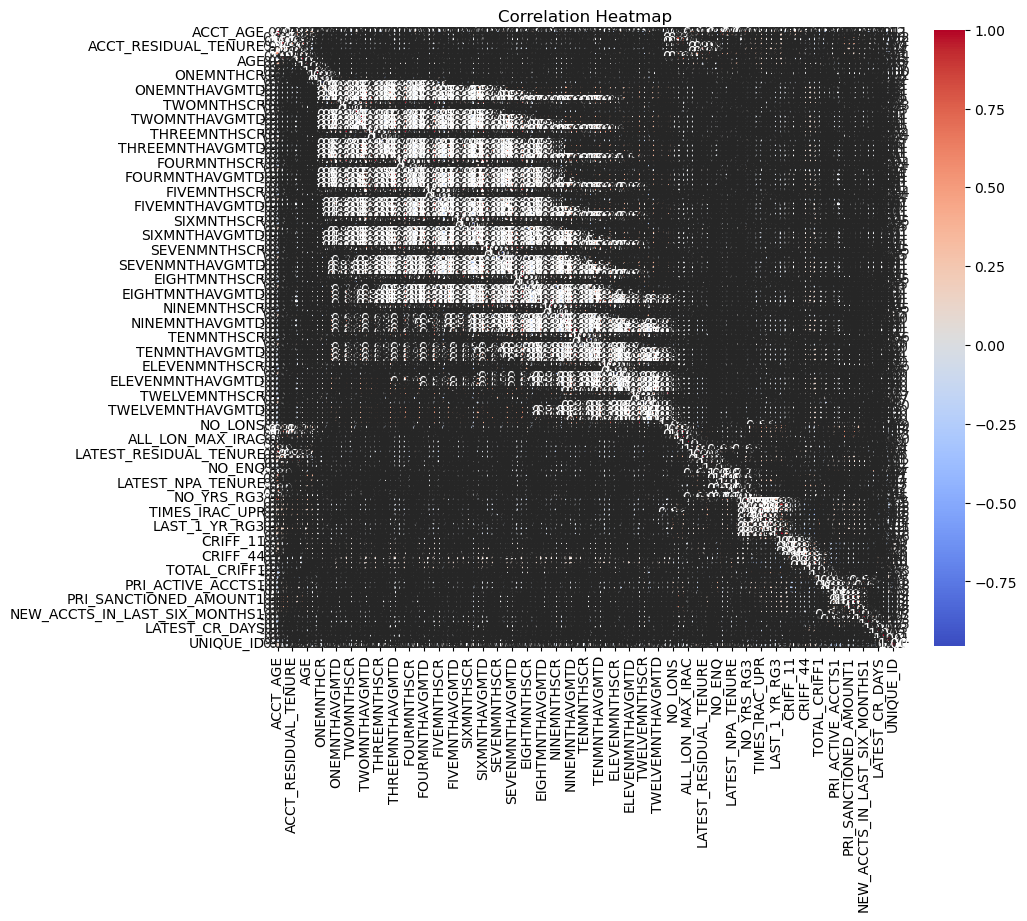

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and show
plt.title('Correlation Heatmap')
plt.show()


In [5]:
grouped_df = df.groupby('PRODUCT_TYPE')['TARGET'].sum().reset_index(name='Count_TARGET_1')

# Display result
print(grouped_df)

     PRODUCT_TYPE  Count_TARGET_1
0       AUTO LOAN            2891
1  EDUCATION LOAN            2112
2       HOME LOAN            4506
3   PERSONAL LOAN           25931


In [8]:
default_rate_df = df.groupby('PRODUCT_TYPE')['TARGET'].agg(
    total='count',
    defaults='sum'
).assign(default_rate=lambda x: x['defaults'] / x['total'])

print(default_rate_df.sort_values(by='default_rate', ascending=False).head(20))


                 total  defaults  default_rate
PRODUCT_TYPE                                  
PERSONAL LOAN   162861     25931      0.159222
EDUCATION LOAN   28639      2112      0.073746
AUTO LOAN        43320      2891      0.066736
HOME LOAN        92921      4506      0.048493


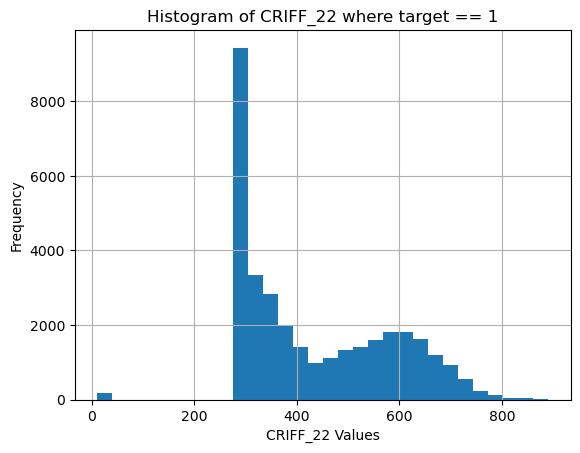

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter rows where target feature == 1
filtered_df = df[df['TARGET'] == 1]

# Plot histogram of CRIFF_22 for filtered data
filtered_df['CRIFF_66'].hist(bins=30)

plt.xlabel('CRIFF_22 Values')
plt.ylabel('Frequency')
plt.title('Histogram of CRIFF_22 where target == 1')
plt.show()


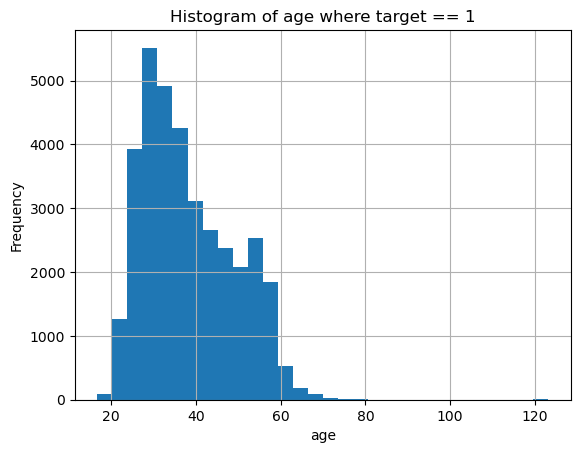

In [11]:
filtered_df = df[df['TARGET'] == 1]

filtered_df['AGE'].hist(bins=30)

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age where target == 1')
plt.show()

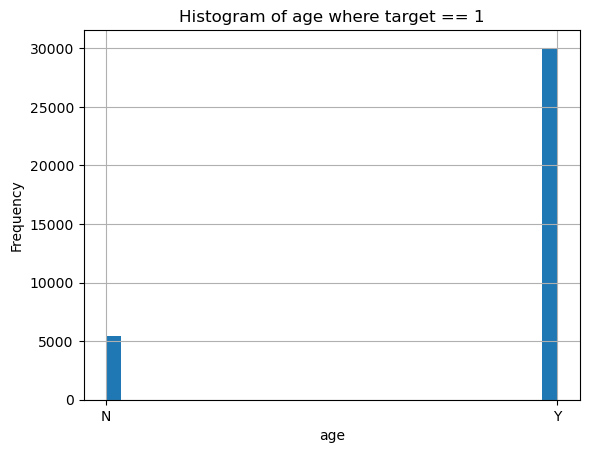

In [12]:
filtered_df = df[df['TARGET'] == 1]

filtered_df['SI_FLG'].hist(bins=30)

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age where target == 1')
plt.show()

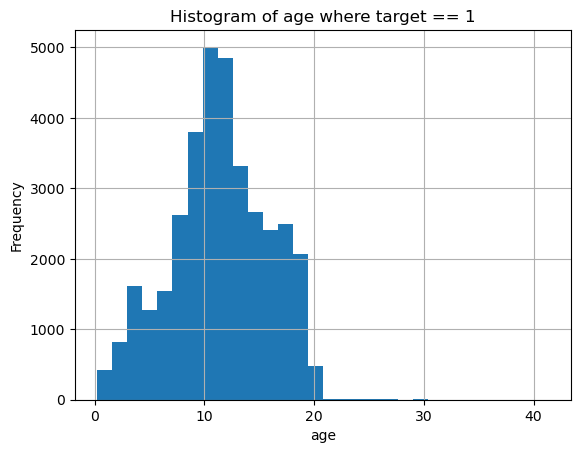

In [13]:
filtered_df = df[df['TARGET'] == 1]

filtered_df['VINTAGE'].hist(bins=30)

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age where target == 1')
plt.show()

In [14]:
default_rate_df = df.groupby('EKYC_FLG')['TARGET'].agg(
    total='count',
    defaults='sum'
).assign(default_rate=lambda x: x['defaults'] / x['total'])

print(default_rate_df.sort_values(by='default_rate', ascending=False).head(20))

           total  defaults  default_rate
EKYC_FLG                                
Y          15882      2332      0.146833
N         311857     33108      0.106164


In [42]:
default_rate_df = df.groupby('INCOME_BAND1')['TARGET'].agg(
    total='count',
    defaults='sum'
).assign(default_rate=lambda x: x['defaults'] / x['total'])

print(default_rate_df.sort_values(by='default_rate', ascending=False).head(20))

               total  defaults  default_rate
INCOME_BAND1                                
EX01              19         5      0.263158
B               8607      1690      0.196352
D              53794      9120      0.169536
C              18394      2816      0.153093
A                 28         4      0.142857
E              34078      4283      0.125682
F             107144     10095      0.094219
EX04              44         4      0.090909
G              51225      4241      0.082792
EX02              38         3      0.078947
EX05           12135       868      0.071529
H              35715      1944      0.054431


In [18]:
skew = df.kurtosis(numeric_only=True)
skew_df = pd.DataFrame(skew, columns=["Skewness"])
skew_df.head()


,Skewness
ACCT_AGE,1.467243
LIMIT,642.746757
OUTS,402.301967
ACCT_RESIDUAL_TENURE,2.692270
LOAN_TENURE,0.175228


In [20]:
default_rate_df = df.groupby(['NO_LONS', 'ALL_LON_MAX_IRAC'])['TARGET'].agg(
    total='count',
    defaults='sum'
).assign(default_rate=lambda x: x['defaults'] / x['total'])

# View top 20 by default rate
print(default_rate_df.sort_values(by='default_rate', ascending=False).head(20))


                           total  defaults  default_rate
NO_LONS ALL_LON_MAX_IRAC                                
2       4                    244       206      0.844262
3       4                    122        97      0.795082
4       4                     31        21      0.677419
5       4                      3         2      0.666667
6       4                      2         1      0.500000
2       6                      6         2      0.333333
        8                      5         1      0.200000
        5                      7         1      0.142857
1       3                 187755     24758      0.131863
2       3                  89251      7457      0.083551
3       3                  33877      2240      0.066122
4       3                  10102       457      0.045239
6       3                   1386        49      0.035354
5       3                   3672       128      0.034858
8       3                    281         8      0.028470
9       3                    16

In [21]:
data = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
data.iloc[30:40]


,0
TENMNTHAVGMTD,29880
TENMNTHAVGQTD,29880
TENMNTHAVGYTD,29880
TENMNTHSDR,29880
ELEVENMNTHSCR,29829
ELEVENMNTHSDR,29829
ELEVENMNTHOUTSTANGBAL,29829
ELEVENMNTHAVGMTD,29829
ELEVENMNTHAVGQTD,29829
ELEVENMNTHAVGYTD,29829


In [22]:
import pandas as pd

# Correlation using pandas (Pearson correlation by default)
correlation = df['EIGHTMNTHSCR'].corr(df['EIGHTMNTHSDR'])
print(correlation)


-0.9540725065055302


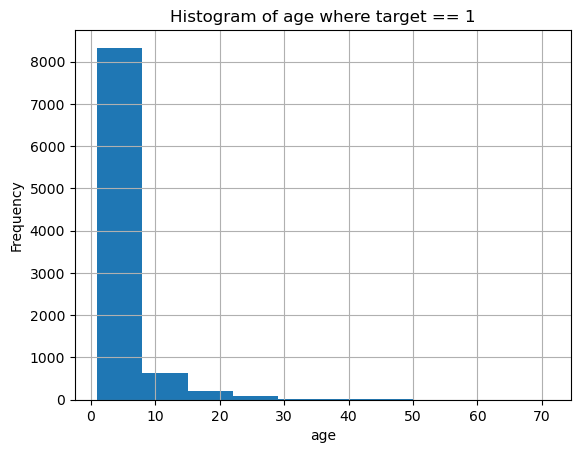

In [47]:
filtered_df = df[df['TARGET'] == 1]

filtered_df['CUST_NO_OF_TIMES_NPA'].hist()

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age where target == 1')
plt.show()